In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inpPath = "C:/CarolineZiegler/Studium_DCU/8. Semester/Business Analytics Portfolio/Portfolio/03_Healthcare/"
COVDf = pd.read_csv(inpPath + "COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv", delimiter =  ",", header = 0)
COVDf

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,AK,2021/05/21,1,23,0,2,22,0,0.0,24,...,NaN,0,NaN,0,NaN,0,56.0,24,70.0,24
1,IA,2021/05/21,0,34,92,0,34,92,0.0,124,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,MS,2021/05/18,11,87,2,12,86,2,2.0,98,...,NaN,0,NaN,0,NaN,0,104.0,98,175.0,98
3,NV,2021/05/18,0,1,59,0,1,59,21.0,58,...,NaN,0,NaN,0,NaN,0,0.0,1,0.0,1
4,NE,2021/05/16,8,92,1,15,85,1,0.0,100,...,NaN,0,NaN,0,NaN,0,0.0,16,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76038,OH,2023/03/06,0,35,153,6,52,130,33.0,184,...,2.0,184,0.0,184,7.0,184,422.0,184,553.0,184
76039,FL,2023/03/20,6,51,159,34,106,76,63.0,210,...,0.0,205,2.0,207,7.0,210,664.0,210,968.0,209
76040,CO,2023/03/03,0,23,72,3,70,22,7.0,93,...,1.0,86,0.0,93,1.0,93,69.0,93,102.0,93
76041,NH,2023/02/24,3,1,22,3,4,19,4.0,26,...,0.0,26,0.0,26,1.0,26,0.0,26,14.0,26


In [3]:
#understanding the dataset structure and input
COVDf.describe()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
count,76043.000000,76043.000000,76043.000000,76043.000000,76043.000000,76043.000000,75426.000000,76043.000000,76038.000000,76043.00000,...,39015.000000,76043.000000,39747.000000,76043.000000,45894.000000,76043.000000,67740.000000,76043.000000,67727.000000,76043.000000
mean,8.288639,49.620360,45.292006,13.210368,62.601923,27.388714,21.044096,89.493878,13295.796062,101.47840,...,0.546636,48.044764,0.635545,50.034822,2.686735,54.954552,161.664364,77.761346,242.843607,77.616165
std,15.339498,60.134037,68.782305,19.407072,59.849536,58.355247,50.230697,88.266584,14632.757154,91.53108,...,1.421237,76.556843,4.405897,78.762346,6.019892,79.441547,274.047223,85.935633,414.793987,85.957856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,4.000000,1.000000,17.000000,3.000000,1.000000,29.000000,3125.000000,43.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,14.000000,29.000000,14.000000
50%,2.000000,27.000000,20.000000,7.000000,52.000000,9.000000,6.000000,64.000000,8845.500000,90.00000,...,0.000000,4.000000,0.000000,4.000000,1.000000,22.000000,68.000000,58.000000,104.000000,58.000000
75%,10.000000,80.000000,58.000000,19.000000,90.000000,28.000000,20.000000,121.000000,16967.000000,132.00000,...,1.000000,85.000000,0.000000,90.000000,3.000000,93.000000,179.000000,111.000000,272.000000,110.000000
max,191.000000,494.000000,523.000000,204.000000,469.000000,523.000000,1334.000000,597.000000,108966.000000,598.00000,...,101.000000,591.000000,155.000000,595.000000,346.000000,595.000000,2580.000000,597.000000,3917.000000,597.000000


In [4]:
COVDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76043 entries, 0 to 76042
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 78.3+ MB


In [5]:
COVDf.isnull().sum()

state                                                         0
date                                                          0
critical_staffing_shortage_today_yes                          0
critical_staffing_shortage_today_no                           0
critical_staffing_shortage_today_not_reported                 0
                                                           ... 
staffed_icu_pediatric_patients_confirmed_covid_coverage       0
staffed_pediatric_icu_bed_occupancy                        8303
staffed_pediatric_icu_bed_occupancy_coverage                  0
total_staffed_pediatric_icu_beds                           8316
total_staffed_pediatric_icu_beds_coverage                     0
Length: 135, dtype: int64

In [6]:
#convert 'date' column to datetime format
COVDf['date'] = pd.to_datetime(COVDf['date'], format='%Y/%m/%d')

In [7]:
print(COVDf.columns)

Index(['state', 'date', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid', 'hospital_onset_covid_coverage',
       ...
       'previous_day_admission_pediatric_covid_confirmed_5_11',
       'previous_day_admission_pediatric_covid_confirmed_5_11_coverage',
       'previous_day_admission_pediatric_covid_confirmed_unknown',
       'previous_day_admission_pediatric_covid_confirmed_unknown_coverage',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'staffed_icu_pediatric_patients_confirmed_covid_coverage',
       'staffed_pediatric_icu_bed_occupancy',
       'staffed_pediatric_icu_bed_occupancy_coverage',
       'total_staffed_pediatric_icu_beds',
       't

In [8]:
for column_name in COVDf.columns:
    print(column_name)

state
date
critical_staffing_shortage_today_yes
critical_staffing_shortage_today_no
critical_staffing_shortage_today_not_reported
critical_staffing_shortage_anticipated_within_week_yes
critical_staffing_shortage_anticipated_within_week_no
critical_staffing_shortage_anticipated_within_week_not_reported
hospital_onset_covid
hospital_onset_covid_coverage
inpatient_beds
inpatient_beds_coverage
inpatient_beds_used
inpatient_beds_used_coverage
inpatient_beds_used_covid
inpatient_beds_used_covid_coverage
previous_day_admission_adult_covid_confirmed
previous_day_admission_adult_covid_confirmed_coverage
previous_day_admission_adult_covid_suspected
previous_day_admission_adult_covid_suspected_coverage
previous_day_admission_pediatric_covid_confirmed
previous_day_admission_pediatric_covid_confirmed_coverage
previous_day_admission_pediatric_covid_suspected
previous_day_admission_pediatric_covid_suspected_coverage
staffed_adult_icu_bed_occupancy
staffed_adult_icu_bed_occupancy_coverage
staffed_icu_

In [9]:
#high dimensionality of dataset with 134 columns, therefore a feature selection for the most critical parts is necessary
#with the goal to understand hopsitality capacit needs better as well as critical staff shortages, the following columns were selected for further analysis
subset_COVDf = COVDf[['state','date', 'critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no', 'inpatient_beds_used_covid', 'total_adult_patients_hospitalized_confirmed_covid',
    'total_pediatric_patients_hospitalized_confirmed_covid', 'inpatient_beds', 'inpatient_beds_used', 'total_staffed_adult_icu_beds', 'staffed_adult_icu_bed_occupancy']]
subset_COVDf

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds,inpatient_beds_used,total_staffed_adult_icu_beds,staffed_adult_icu_bed_occupancy
0,AK,2021-05-21,1,23,20.0,19.0,0.0,1643.0,1090.0,133.0,98.0
1,IA,2021-05-21,0,34,212.0,129.0,2.0,8079.0,5223.0,676.0,441.0
2,MS,2021-05-18,11,87,232.0,159.0,3.0,8135.0,5110.0,858.0,610.0
3,NV,2021-05-18,0,1,297.0,267.0,11.0,8672.0,6205.0,856.0,575.0
4,NE,2021-05-16,8,92,107.0,96.0,1.0,4346.0,2675.0,567.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...
76038,OH,2023-03-06,0,35,989.0,788.0,28.0,26090.0,19942.0,3636.0,2546.0
76039,FL,2023-03-20,6,51,1326.0,1114.0,28.0,55108.0,41743.0,6467.0,4694.0
76040,CO,2023-03-03,0,23,224.0,166.0,11.0,10475.0,7111.0,1239.0,771.0
76041,NH,2023-02-24,3,1,56.0,48.0,1.0,2255.0,1806.0,219.0,179.0


In [10]:
subset_COVDf.isnull().sum()

state                                                       0
date                                                        0
critical_staffing_shortage_today_yes                        0
critical_staffing_shortage_today_no                         0
inpatient_beds_used_covid                                 471
total_adult_patients_hospitalized_confirmed_covid        6521
total_pediatric_patients_hospitalized_confirmed_covid    7199
inpatient_beds                                              5
inpatient_beds_used                                       264
total_staffed_adult_icu_beds                             7003
staffed_adult_icu_bed_occupancy                          7196
dtype: int64

In [11]:
#There are missing values in several columns, as indicated by NaN entries. For example, the total_staffed_pediatric_icu_beds column has missing values in the first few rows

In [12]:
#dropping misssing values
subset_COVDf.dropna(inplace = True)

C:\Users\CZ\AppData\Local\Temp\ipykernel_9328\4032838555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_COVDf.dropna(inplace = True)


In [13]:
subset_COVDf

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds,inpatient_beds_used,total_staffed_adult_icu_beds,staffed_adult_icu_bed_occupancy
0,AK,2021-05-21,1,23,20.0,19.0,0.0,1643.0,1090.0,133.0,98.0
1,IA,2021-05-21,0,34,212.0,129.0,2.0,8079.0,5223.0,676.0,441.0
2,MS,2021-05-18,11,87,232.0,159.0,3.0,8135.0,5110.0,858.0,610.0
3,NV,2021-05-18,0,1,297.0,267.0,11.0,8672.0,6205.0,856.0,575.0
4,NE,2021-05-16,8,92,107.0,96.0,1.0,4346.0,2675.0,567.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...
76038,OH,2023-03-06,0,35,989.0,788.0,28.0,26090.0,19942.0,3636.0,2546.0
76039,FL,2023-03-20,6,51,1326.0,1114.0,28.0,55108.0,41743.0,6467.0,4694.0
76040,CO,2023-03-03,0,23,224.0,166.0,11.0,10475.0,7111.0,1239.0,771.0
76041,NH,2023-02-24,3,1,56.0,48.0,1.0,2255.0,1806.0,219.0,179.0


In [14]:
subset_COVDf.isnull().sum()

state                                                    0
date                                                     0
critical_staffing_shortage_today_yes                     0
critical_staffing_shortage_today_no                      0
inpatient_beds_used_covid                                0
total_adult_patients_hospitalized_confirmed_covid        0
total_pediatric_patients_hospitalized_confirmed_covid    0
inpatient_beds                                           0
inpatient_beds_used                                      0
total_staffed_adult_icu_beds                             0
staffed_adult_icu_bed_occupancy                          0
dtype: int64

In [15]:
subset_COVDf.reset_index(inplace=True)
subset_COVDf

,index,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds,inpatient_beds_used,total_staffed_adult_icu_beds,staffed_adult_icu_bed_occupancy
0,0,AK,2021-05-21,1,23,20.0,19.0,0.0,1643.0,1090.0,133.0,98.0
1,1,IA,2021-05-21,0,34,212.0,129.0,2.0,8079.0,5223.0,676.0,441.0
2,2,MS,2021-05-18,11,87,232.0,159.0,3.0,8135.0,5110.0,858.0,610.0
3,3,NV,2021-05-18,0,1,297.0,267.0,11.0,8672.0,6205.0,856.0,575.0
4,4,NE,2021-05-16,8,92,107.0,96.0,1.0,4346.0,2675.0,567.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68449,76038,OH,2023-03-06,0,35,989.0,788.0,28.0,26090.0,19942.0,3636.0,2546.0
68450,76039,FL,2023-03-20,6,51,1326.0,1114.0,28.0,55108.0,41743.0,6467.0,4694.0
68451,76040,CO,2023-03-03,0,23,224.0,166.0,11.0,10475.0,7111.0,1239.0,771.0
68452,76041,NH,2023-02-24,3,1,56.0,48.0,1.0,2255.0,1806.0,219.0,179.0


In [16]:
subset_COVDf.drop('index', inplace = True, axis=1)

C:\Users\CZ\AppData\Local\Temp\ipykernel_9328\900233400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_COVDf.drop('index', inplace = True, axis=1)


In [17]:
subset_COVDf

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds,inpatient_beds_used,total_staffed_adult_icu_beds,staffed_adult_icu_bed_occupancy
0,AK,2021-05-21,1,23,20.0,19.0,0.0,1643.0,1090.0,133.0,98.0
1,IA,2021-05-21,0,34,212.0,129.0,2.0,8079.0,5223.0,676.0,441.0
2,MS,2021-05-18,11,87,232.0,159.0,3.0,8135.0,5110.0,858.0,610.0
3,NV,2021-05-18,0,1,297.0,267.0,11.0,8672.0,6205.0,856.0,575.0
4,NE,2021-05-16,8,92,107.0,96.0,1.0,4346.0,2675.0,567.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...
68449,OH,2023-03-06,0,35,989.0,788.0,28.0,26090.0,19942.0,3636.0,2546.0
68450,FL,2023-03-20,6,51,1326.0,1114.0,28.0,55108.0,41743.0,6467.0,4694.0
68451,CO,2023-03-03,0,23,224.0,166.0,11.0,10475.0,7111.0,1239.0,771.0
68452,NH,2023-02-24,3,1,56.0,48.0,1.0,2255.0,1806.0,219.0,179.0


In [20]:
subset_COVDf['state'].unique()

array(['AK', 'IA', 'MS', 'NV', 'NE', 'MT', 'ND', 'DE', 'RI', 'LA', 'ID',
       'HI', 'NM', 'KS', 'PR', 'MA', 'CO', 'WY', 'NH', 'VT', 'ME', 'SD',
       'DC', 'MD', 'AR', 'MN', 'VI', 'WA', 'SC', 'AS', 'UT', 'WV', 'WI',
       'AL', 'CT', 'TN', 'OR', 'KY', 'MI', 'MO', 'NJ', 'GA', 'OK', 'PA',
       'IL', 'VA', 'OH', 'NY', 'TX', 'IN', 'NC', 'AZ', 'FL', 'CA'],
      dtype=object)

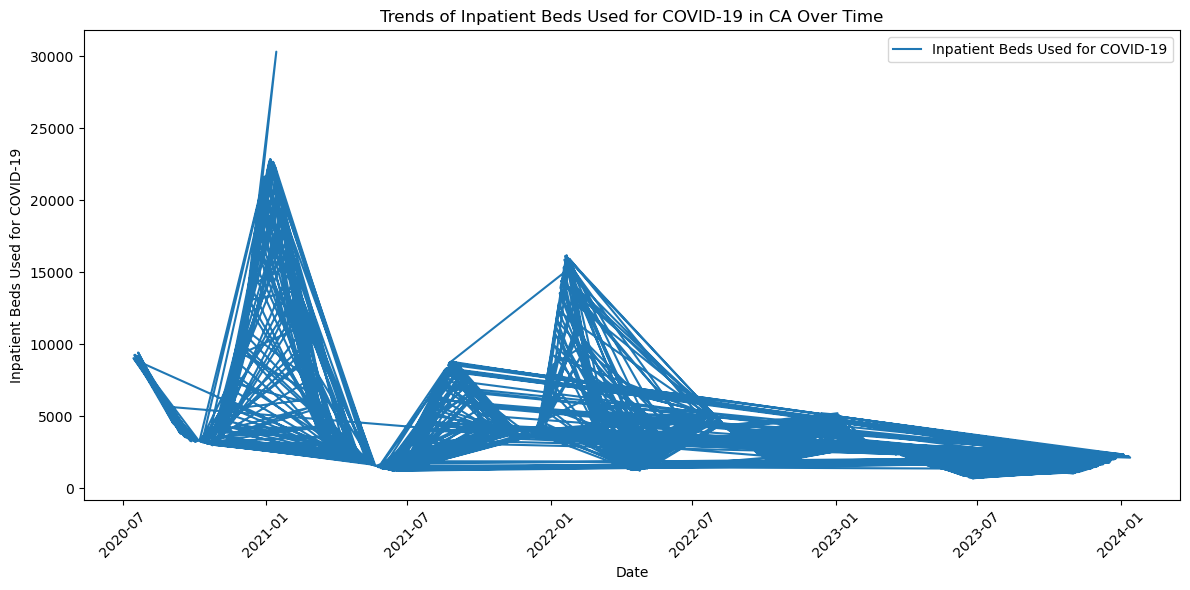

In [18]:
#data anylsis to understand the inpatient beds and critical staffing better
#plot inpatient beds used for COVID-19 over time for a sample state

sample_state = 'CA'
state_data = subset_COVDf[subset_COVDf['state'] == sample_state]
plt.figure(figsize=(12, 6))
plt.plot(state_data['date'], state_data['inpatient_beds_used_covid'], label='Inpatient Beds Used for COVID-19')
plt.title(f'Trends of Inpatient Beds Used for COVID-19 in {sample_state} Over Time')
plt.xlabel('Date')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [19]:
#the plot shows the trend of inpatient beds used for COVID-19 in California. It provides a visual representation of how the usage of inpatient beds for COVID-19 patients has fluctuated over time being crucial for understanding the impact of COVID-19 waves and the resulting pressure on hospital capacities.

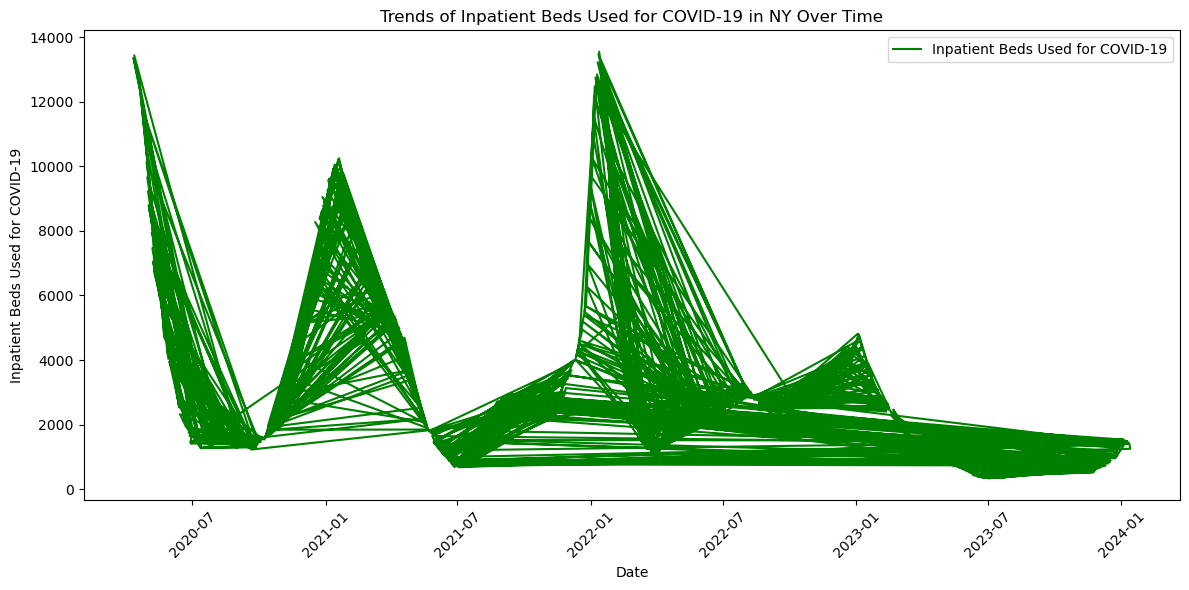

In [25]:
sample_state2 = 'NY'
state_data2 = subset_COVDf[subset_COVDf['state'] == sample_state2]
plt.figure(figsize=(12, 6))
plt.plot(state_data2['date'], state_data2['inpatient_beds_used_covid'], label='Inpatient Beds Used for COVID-19', c = 'green')
plt.title(f'Trends of Inpatient Beds Used for COVID-19 in {sample_state2} Over Time')
plt.xlabel('Date')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [23]:
#similar structure of fluctuations; however, CA did have many more inpatient beds

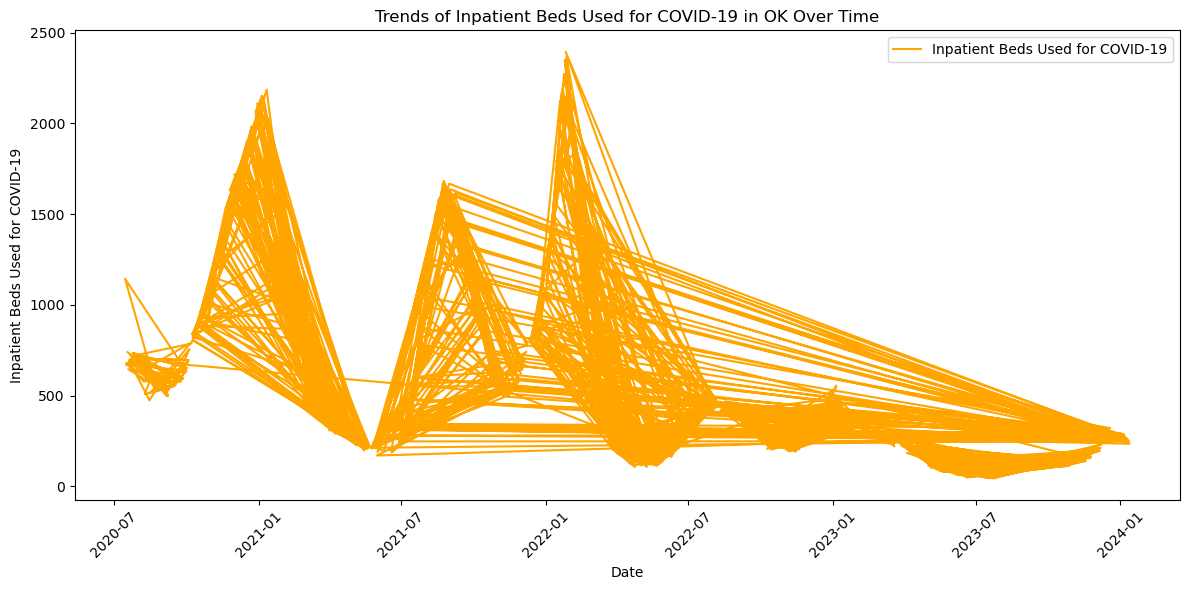

In [26]:
sample_state3 = 'OK'
state_data3 = subset_COVDf[subset_COVDf['state'] == sample_state3]
plt.figure(figsize=(12, 6))
plt.plot(state_data3['date'], state_data3['inpatient_beds_used_covid'], label='Inpatient Beds Used for COVID-19', c = 'orange')
plt.title(f'Trends of Inpatient Beds Used for COVID-19 in {sample_state3} Over Time')
plt.xlabel('Date')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

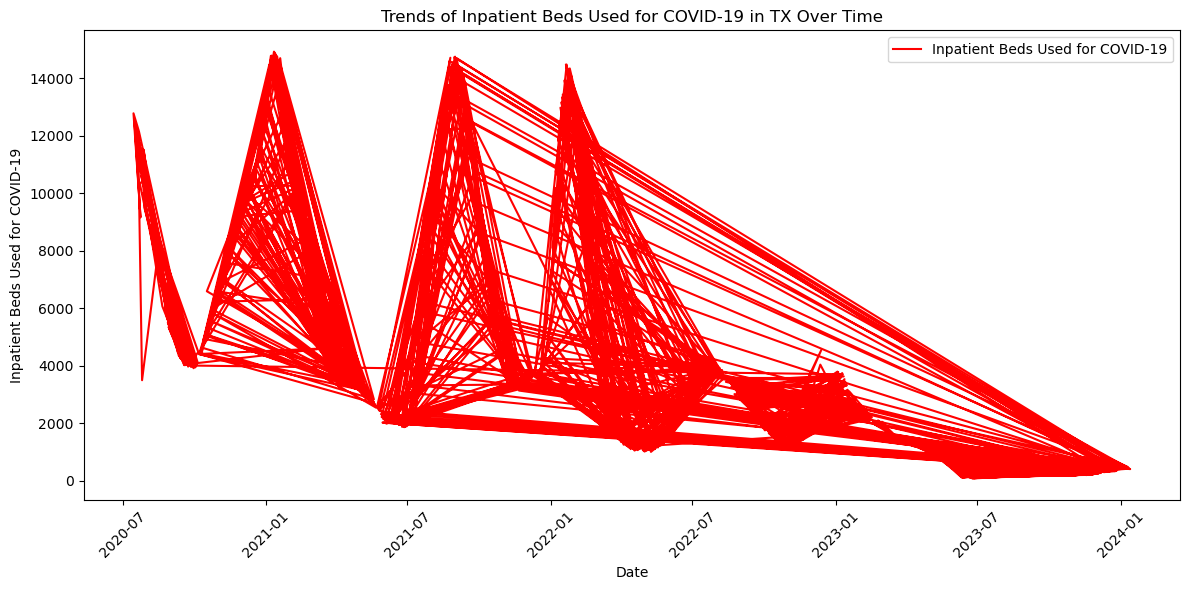

In [27]:
sample_state4 = 'TX'
state_data4 = subset_COVDf[subset_COVDf['state'] == sample_state4]
plt.figure(figsize=(12, 6))
plt.plot(state_data4['date'], state_data4['inpatient_beds_used_covid'], label='Inpatient Beds Used for COVID-19', c = 'red')
plt.title(f'Trends of Inpatient Beds Used for COVID-19 in {sample_state4} Over Time')
plt.xlabel('Date')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

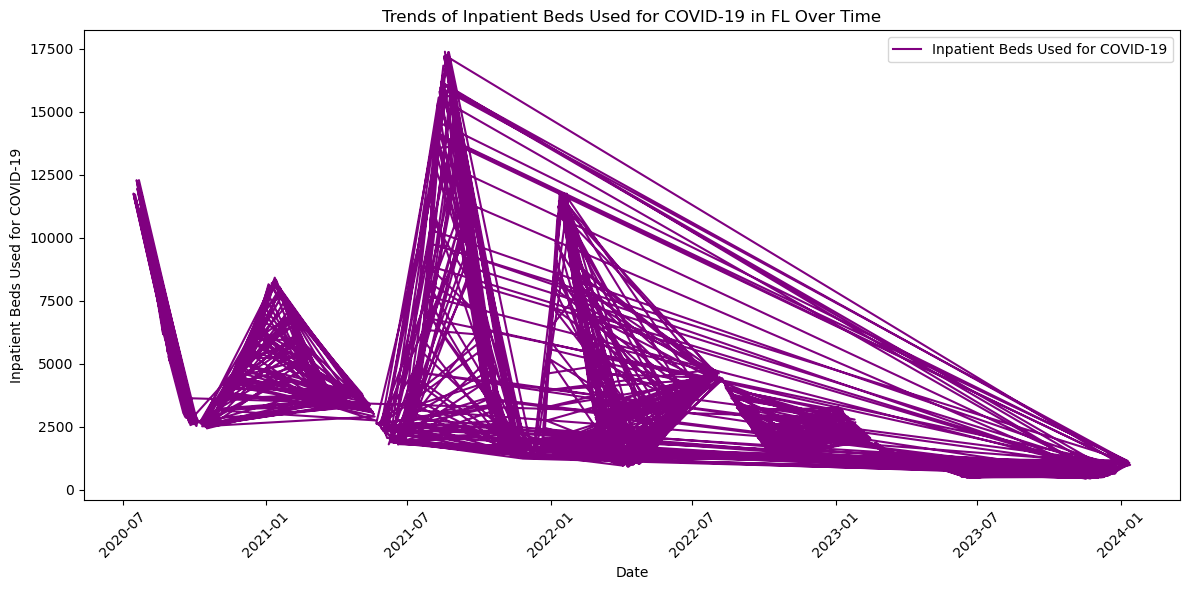

In [28]:
sample_state5 = 'FL'
state_data5 = subset_COVDf[subset_COVDf['state'] == sample_state5]
plt.figure(figsize=(12, 6))
plt.plot(state_data5['date'], state_data5['inpatient_beds_used_covid'], label='Inpatient Beds Used for COVID-19', c = 'purple')
plt.title(f'Trends of Inpatient Beds Used for COVID-19 in {sample_state5} Over Time')
plt.xlabel('Date')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [30]:
import seaborn as sns

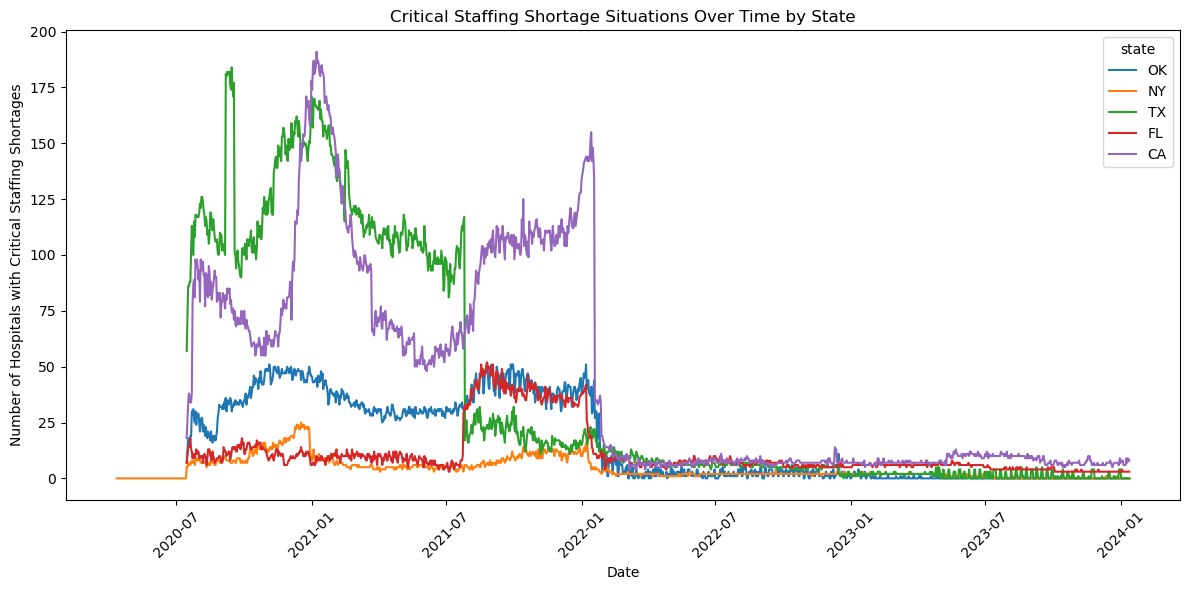

In [31]:
#critical staffing shortage situations over time by state
states_to_compare = ['CA', 'NY', 'OK', 'TX', 'FL']
shortage_comparison_data = subset_COVDf[subset_COVDf['state'].isin(states_to_compare)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=shortage_comparison_data, x='date', y='critical_staffing_shortage_today_yes', hue='state')
plt.title('Critical Staffing Shortage Situations Over Time by State')
plt.xlabel('Date')
plt.ylabel('Number of Hospitals with Critical Staffing Shortages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
#critical staffing shortage was especially between 07/2020 and 01/2022 highlighting the temporal patterns of staffing shortages and differences between these states

In [34]:
#understanding the hospital capacity utilization on a national level over time better (more holistic analysis than only some states)
#calculate the national average of bed utilization over time
national_avg_utilization = subset_COVDf.groupby('date')['inpatient_beds_used_covid'].mean().reset_index()
national_avg_utilization

,date,inpatient_beds_used_covid
0,2020-01-02,1877.00
1,2020-01-03,1877.00
2,2020-01-04,1877.00
3,2020-01-05,1877.00
4,2020-01-06,1877.00
...,...,...
1383,2024-01-09,403.60
1384,2024-01-10,395.96
1385,2024-01-11,385.82
1386,2024-01-12,374.32


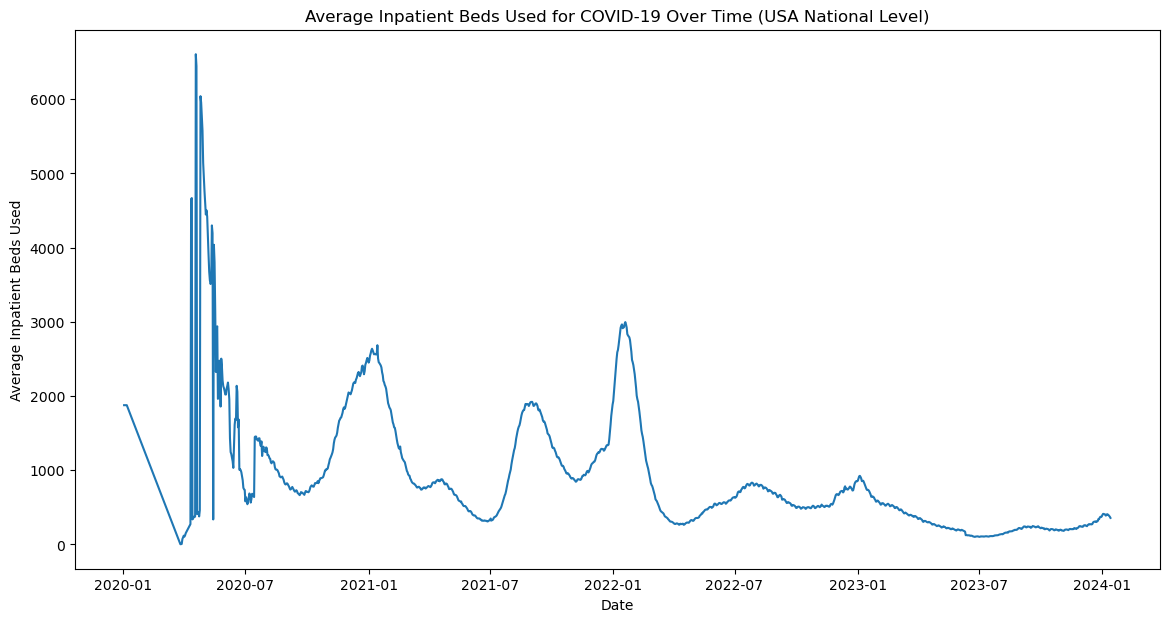

In [36]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=national_avg_utilization, x='date', y='inpatient_beds_used_covid')
plt.title('Average Inpatient Beds Used for COVID-19 Over Time (USA National Level)')
plt.xlabel('Date')
plt.ylabel('Average Inpatient Beds Used')
plt.show()

In [37]:
#staffing shortages over time on a national level
#calculate the national average of staffing shortages over time
national_avg_staffing_shortage = subset_COVDf.groupby('date')['critical_staffing_shortage_today_yes'].mean().reset_index()
national_avg_staffing_shortage

,date,critical_staffing_shortage_today_yes
0,2020-01-02,16.00
1,2020-01-03,16.00
2,2020-01-04,16.00
3,2020-01-05,16.00
4,2020-01-06,16.00
...,...,...
1383,2024-01-09,2.44
1384,2024-01-10,2.46
1385,2024-01-11,2.50
1386,2024-01-12,2.48


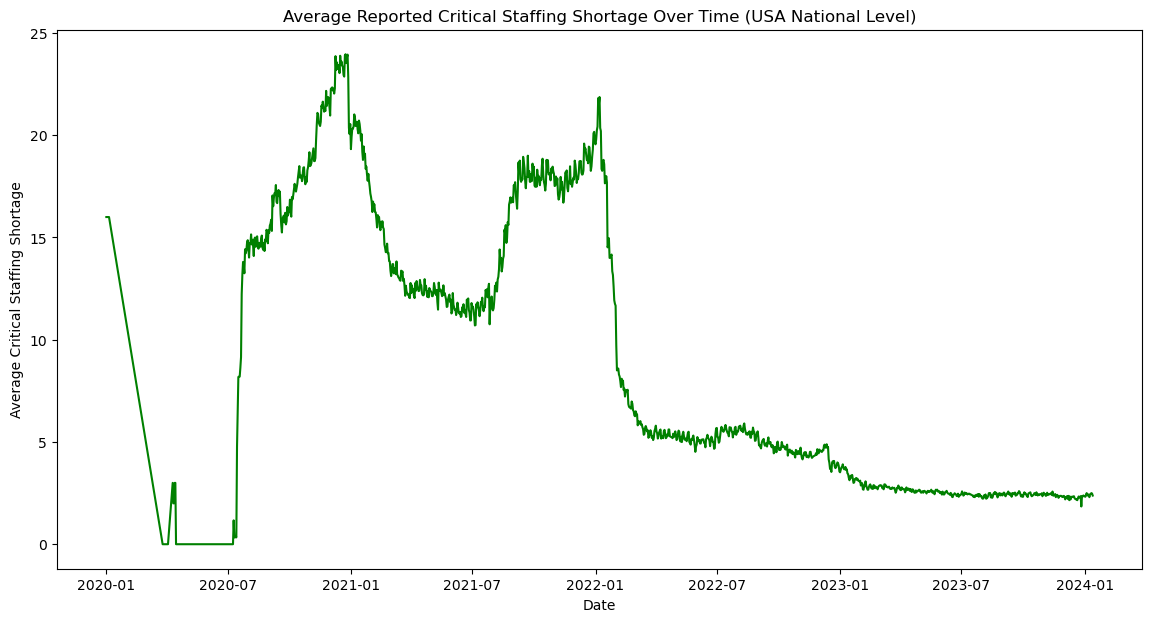

In [39]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=national_avg_staffing_shortage, x='date', y='critical_staffing_shortage_today_yes', c = "green")
plt.title('Average Reported Critical Staffing Shortage Over Time (USA National Level)')
plt.xlabel('Date')
plt.ylabel('Average Critical Staffing Shortage')
plt.show()

In [41]:
#comparison analysis of the states
#compare the latest date in the dataset
latest_date = subset_COVDf['date'].max()
state_comparison = subset_COVDf[subset_COVDf['date'] == latest_date]

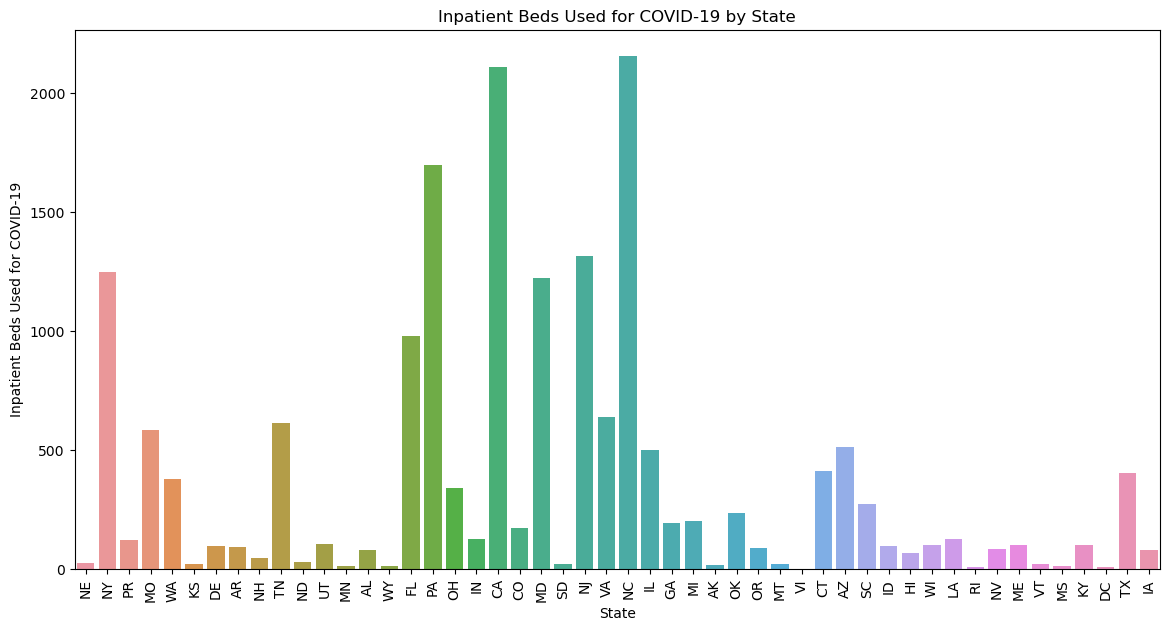

In [42]:
plt.figure(figsize=(14, 7))
sns.barplot(data=state_comparison, x='state', y='inpatient_beds_used_covid')
plt.title('Inpatient Beds Used for COVID-19 by State')
plt.xlabel('State')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.xticks(rotation=90)
plt.show()

In [44]:
#compare the earliest date in the dataset
earliest_date = subset_COVDf['date'].min()
state_comparison2 = subset_COVDf[subset_COVDf['date'] == earliest_date]

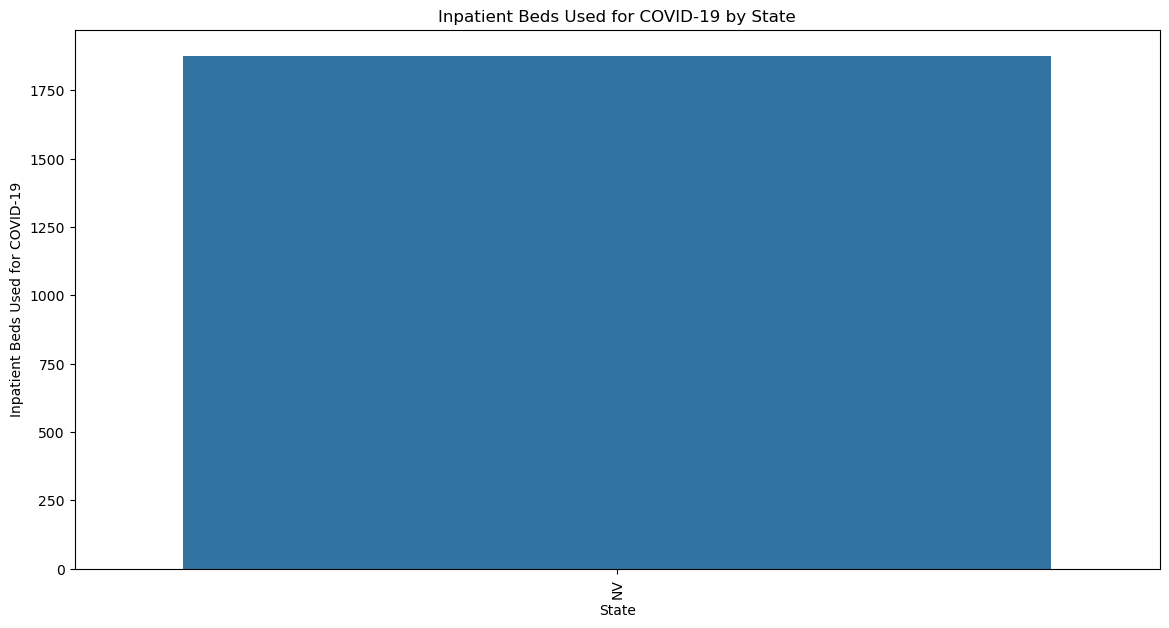

In [45]:
plt.figure(figsize=(14, 7))
sns.barplot(data=state_comparison2, x='state', y='inpatient_beds_used_covid')
plt.title('Inpatient Beds Used for COVID-19 by State')
plt.xlabel('State')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.xticks(rotation=90)
plt.show()

In [46]:
#the state NV was the first to register inpatient beds

In [47]:
#with these insights, a more detailed comparative analysis of hospital capacities over time and between states can be done through predictive analysis, focusing on identifying key patterns, seasonalities, and anomalies

In [48]:
#time series forecasting for future hospital capacity needs
#model and forecast future hospital capacity needs, employing time series analysis techniques
#considering the seasonal patterns and potential for recurring waves of infections, models like ARIMA or SARIMA will be applied and tested 

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [52]:
#data preparation
ts_data = subset_COVDf[subset_COVDf['state'] == 'CA'][['date', 'inpatient_beds_used_covid']].copy()
ts_data.set_index('date', inplace=True)
ts_data = ts_data.asfreq('D').fillna(method='ffill')

In [53]:
#check for stationarity and prepare data
if adfuller(ts_data['inpatient_beds_used_covid'])[1] >= 0.05:
    ts_data_diff = ts_data.diff().dropna()
else:
    ts_data_diff = ts_data

In [58]:
#splitting the data and training a SARIMAX model
train_data = ts_data_diff[:int(0.8 * len(ts_data_diff))]
test_data = ts_data_diff[int(0.8 * len(ts_data_diff)):]
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=len(test_data))

print('Model Fit:', model_fit)
print('Forecast:', forecast)

Model Fit: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001E157E8F730>
Forecast: 2023-05-03    1590.852053
2023-05-04    1655.968115
2023-05-05    1596.740431
2023-05-06    1603.801255
2023-05-07    1586.988210
                 ...     
2024-01-09      39.449729
2024-01-10      15.817053
2024-01-11     113.041174
2024-01-12      17.788624
2024-01-13      22.126454
Freq: D, Name: predicted_mean, Length: 256, dtype: float64


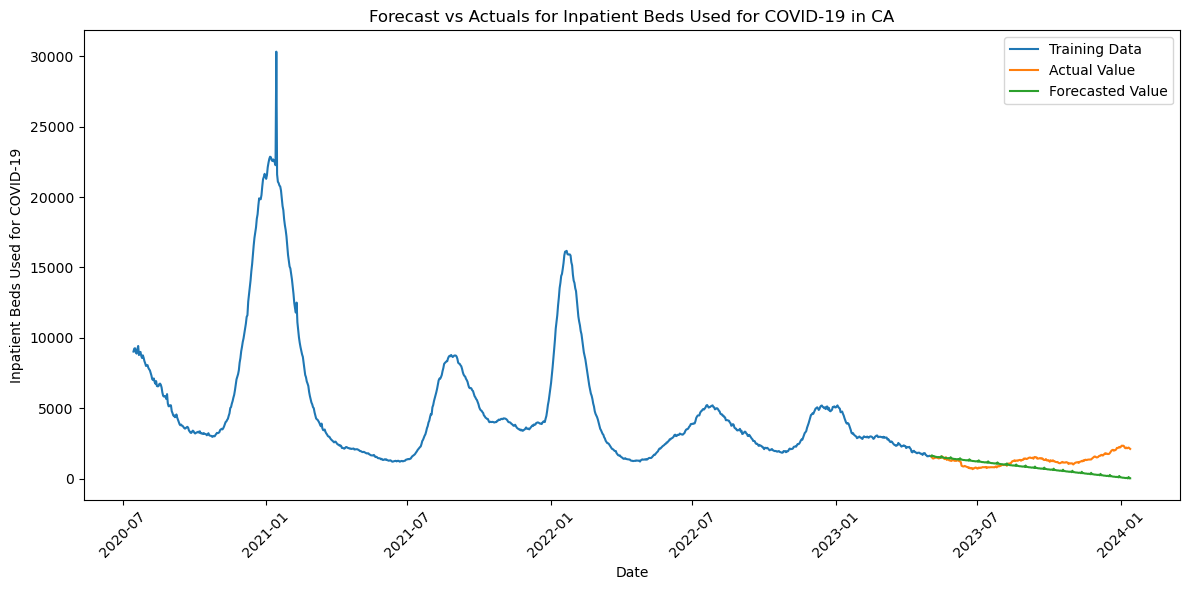

In [59]:
#visualising the forecast vs actuals
forecast_series = pd.Series(forecast, index=test_data.index)
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['inpatient_beds_used_covid'], label='Training Data')
plt.plot(test_data.index, test_data['inpatient_beds_used_covid'], label='Actual Value')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Value')
plt.title('Forecast vs Actuals for Inpatient Beds Used for COVID-19 in CA')
plt.xlabel('Date')
plt.ylabel('Inpatient Beds Used for COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
#the model predicted a continuous decrease; however, the actual numbers increased in the trend

In [63]:
#classification for predicting critical staffing shortages
#aim to predict whether a hospital will face a critical staffing shortage
#RandomForestClassifier was chosen for its robustness to overfitting, ability to handle non-linear data, and ease of use without the need for feature scaling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [64]:
classification_features = [
    'inpatient_beds_used_covid', 'total_adult_patients_hospitalized_confirmed_covid',
    'total_pediatric_patients_hospitalized_confirmed_covid', 'inpatient_beds',
    'inpatient_beds_used', 'total_staffed_adult_icu_beds', 'staffed_adult_icu_bed_occupancy'
]
X = subset_COVDf[classification_features]
y = subset_COVDf['critical_staffing_shortage_today_yes'] > 0  # Binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# RandomForestClassifier model training and evaluation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.954568694762983
              precision    recall  f1-score   support

       False       0.91      0.89      0.90      3223
        True       0.97      0.97      0.97     10468

    accuracy                           0.95     13691
   macro avg       0.94      0.93      0.94     13691
weighted avg       0.95      0.95      0.95     13691



In [66]:
#the RandomForestClassifier model for predicting critical staffing shortages yielded an accuracy of approximately 95.46%
#precision: The model's precision is high across both classes, with 91% for hospitals not facing shortages and 97% for those facing shortages. This indicates a high likelihood that the model's predictions are correct when it predicts a specific class.
#recall: The recall is also strong, at 89% for hospitals not facing shortages and 97% for those facing shortages, suggesting the model is good at identifying actual instances of each class.
#F1-Score: The F1-scores, which balance precision and recall, are 90% and 97% for the two classes, respectively, indicating robust overall performance.

In [67]:
#RandomForestClassifier seems to work quite well
#LogisticRegression will be performed to have a second model to compare the results which will allow for recommending which model to be best used on the data
#Logistic Regression is useful for binary classification problems and understanding the influence of several independent variables on a single outcome variable which is why it was chosen for this dataset

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [69]:
# Train the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
# Predict on the test set
y_pred_lr = lr_classifier.predict(X_test)
y_pred_lr

array([ True,  True,  True, ...,  True,  True,  True])

In [72]:
# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', accuracy_lr)
print('\nLogistic Regression Classification Report:\n', report_lr)

Logistic Regression Accuracy: 0.7704331312541085

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.07      0.13      3223
        True       0.78      0.99      0.87     10468

    accuracy                           0.77     13691
   macro avg       0.69      0.53      0.50     13691
weighted avg       0.73      0.77      0.69     13691



In [73]:
#the LogisticRegression model for predicting critical staffing shortages yielded an accuracy of approximately 77.04%
#precision: the model's precision is medium across both classes, with 60% for hospitals not facing shortages and 78% for those facing shortages. This indicates a high likelihood that the model's predictions are correct when it predicts a specific class.
#recall: the recall is quite low, at 7% for hospitals not facing shortages and quite high with 99% for those facing shortages, suggesting the model is not quite good at identifying actual instances of each class.
#F1-Score: the F1-scores, which balance precision and recall, are 13% and 87% for the two classes, respectively, indicating not a robust performance of the model

In [74]:
#RandomForestClassifier should be the preferred model for predicting critical staff shortages being robust with a high accuracy score